In [20]:
import pandas as pd
import os
import numpy as np
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank
import seaborn as sns
from tqdm import tqdm
import librosa
import matplotlib.pyplot as plt
from plots import *

label
Acoustic_guitar     6.948667
Bass_drum           1.937333
Cello               5.000667
Clarinet            6.596000
Double_bass         3.206000
Flute               8.054667
Hi-hat              3.357333
Saxophone           7.124000
Snare_drum          3.987333
Violin_or_fiddle    4.530000
Name: length, dtype: float64


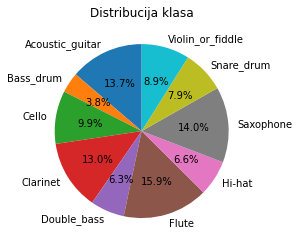

In [43]:
df = pd.read_csv("../data/meta/small_train_labels.csv")

df.set_index('fname', inplace=True)
for f in df.index:
    rate, signal = wavfile.read('../data/small_train/' + f)
    df.at[f, 'length'] = signal.shape[0] / rate # duzina signala
    
classes = list(np.unique(df.label))
class_dist = df.groupby(['label'])['length'].mean()
print(class_dist)

fix, ax = plt.subplots()
ax.set_title("Distribucija klasa")
ax.pie(class_dist, labels=class_dist.index, autopct='%1.1f%%', shadow=False, startangle=90)
df.reset_index(inplace=True)

#nejednako rasprostanjene klase

In [47]:
for c in classes:
    wavfile = df[df.label == c].iloc[0,0]
    signal, rate = librosa.load('../data/small_train/' + wavfile, sr=44100)